In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.layers import Dense,Dropout,SimpleRNN
from keras.models import Sequential
from sklearn.metrics import r2_score
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, Flatten

Using TensorFlow backend.
C:\Users\hhhwa\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hhhwa\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hhhwa\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hhhwa\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
chunksize = 10**5
chunks = pd.read_csv('C:/Users/hhhwa/Desktop/process_data/xtrain.csv',chunksize=chunksize, iterator=True)

X = pd.concat(chunks)

It is already easy to see a bunch of NaN values. And these have to be filled in because simply omitting NaNs dramatically reduces the size of our data.

In [3]:
print('Initial size: {}'.format(X.shape))
print('After NaN omit size: {}'.format(X.dropna().shape))

Initial size: (900000, 58)
After NaN omit size: (2462, 58)


Therefore, we have to fill missing data to avoid unwanted surprises during the models calculation.

In [4]:
X = X.fillna(method='bfill').fillna(method='ffill')
X.head()

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
0,-42.822536,13.0,12.0,75.132502,1.0,2.0,24.0,-45.025510,7.0,1.0,...,17.871210,4.0,15.0,21.863365,-13.349394,-2.215086,-5.137377,20.904186,53.939262,-17.328346
1,-13.478816,13.0,12.0,75.132502,0.0,2.0,24.0,-49.213545,7.0,0.0,...,21.511019,2.0,13.0,-2.880103,21.739125,5.464161,-30.347612,23.304507,47.746225,-47.305489
2,51.702721,13.0,12.0,63.459270,0.0,3.0,24.0,-58.777043,8.0,0.0,...,16.964848,3.0,16.0,21.851623,-26.858262,7.471764,-12.348314,34.406243,34.479515,-33.326172
3,7.633273,12.0,13.0,-15.492561,1.0,1.0,23.0,0.624258,9.0,0.0,...,16.964848,2.0,15.0,-25.128119,-26.858262,54.203501,10.341217,29.080753,40.235855,-35.835956
4,7.633273,13.0,13.0,59.862681,0.0,3.0,23.0,-61.395319,7.0,0.0,...,8.467076,4.0,14.0,30.610006,-15.663721,38.323843,-65.561821,33.965883,50.245794,-44.018245


In [5]:
chunks = pd.read_csv('C:/Users/hhhwa/Desktop/process_data/ytrain.csv',chunksize=chunksize, iterator=True)

y = pd.concat(chunks)

And convert loaded y into array to work with train_test_split function.

In [6]:
y = np.array(y).ravel()

Data distributions
 - Check distribution each columns with histogram

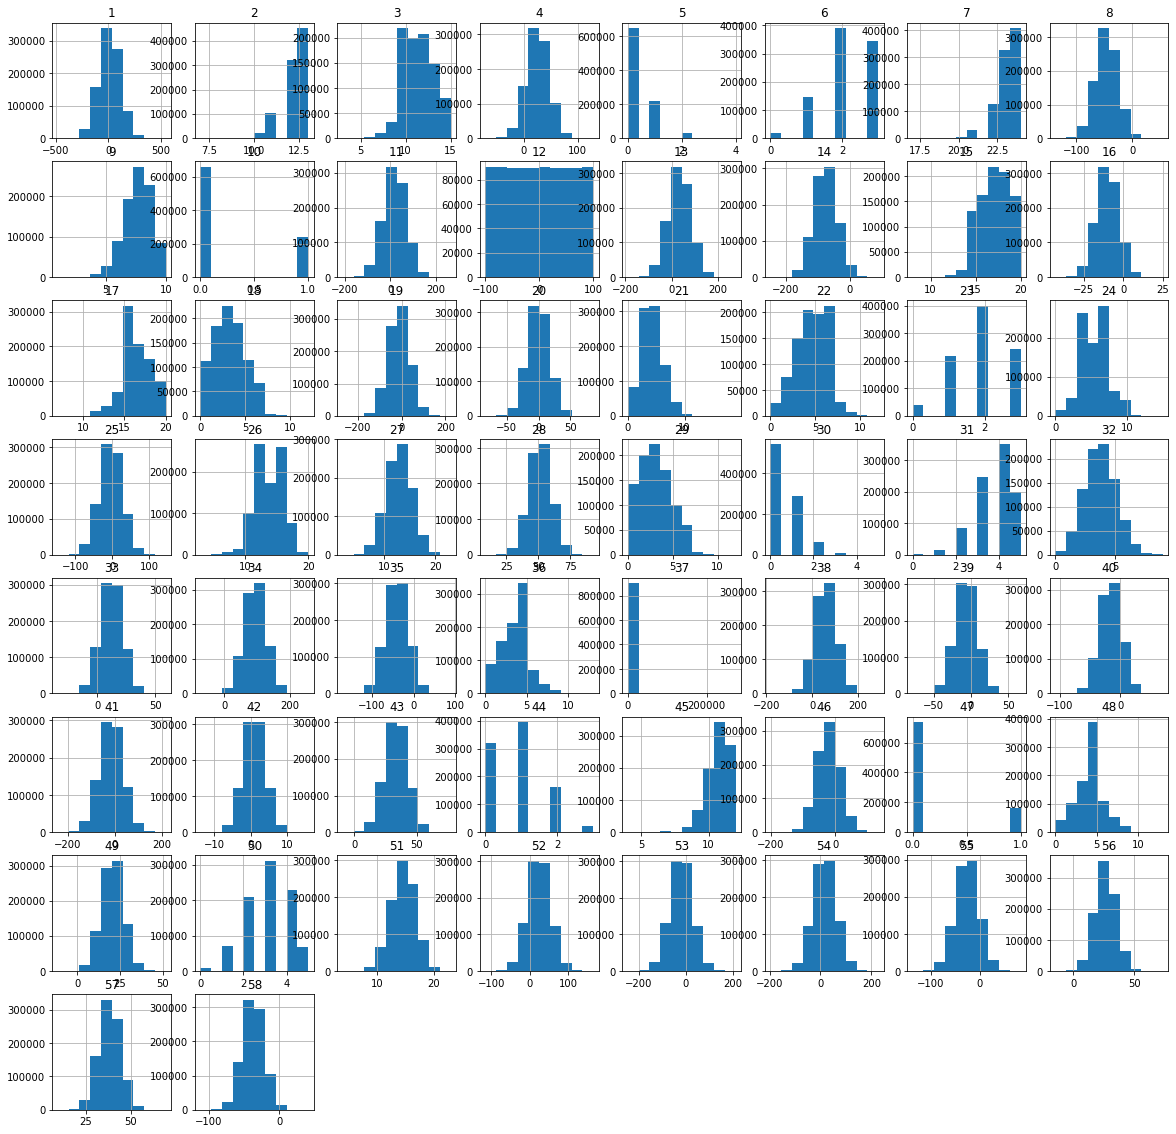

In [7]:
plt.figure(figsize=(20,20))
for i in range(0,58):
    plt.subplot(8,8,i+1)
    plt.title(X.columns[i])
    X.iloc[:,i].hist()

### Data Scaling

In [8]:
X = StandardScaler().fit_transform(X)

i=1
features = []
for i in range(1,59):
    str(i)
    features.append(i)

pd.DataFrame(X, columns=features).head()

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
0,-0.538477,0.841224,0.394245,2.408629,1.279655,-0.233711,0.896478,0.064301,-0.700628,1.648275,...,-0.425458,0.928048,0.138611,-0.074597,0.125332,-0.414234,0.875814,-0.617428,2.605031,1.291050
1,-0.245012,0.841224,0.394245,2.408629,-0.583673,-0.233711,0.896478,-0.146378,-0.700628,-0.606695,...,0.142375,-0.894835,-0.730220,-0.923492,0.861904,-0.244071,-0.194357,-0.335353,1.572204,-0.675577
2,0.406865,0.841224,0.394245,1.843196,-0.583673,1.062514,0.896478,-0.627468,0.076608,-0.606695,...,-0.566856,0.016606,0.573027,-0.074999,-0.158244,-0.199585,0.569710,0.969270,-0.640314,0.241525
3,-0.033871,-0.413812,0.995748,-1.981106,1.279655,-1.529935,-0.256249,2.360706,0.853844,-0.606695,...,-0.566856,-0.894835,0.138611,-1.686774,-0.158244,0.835934,1.532877,0.343444,0.319683,0.076873
4,-0.033871,0.841224,0.995748,1.668983,-0.583673,1.062514,-0.256249,-0.759180,-0.700628,-0.606695,...,-1.892561,0.928048,-0.295804,0.225482,0.076750,0.484060,-1.689194,0.917521,1.989063,-0.459920


In [9]:
# # Transform to normal distribution
# features = X.columns.tolist()
    
# for i in cols:
#     X[i] = (X[i]-X[i].mean())/X[i].std()
    
# pd.DataFrame(X, columns=features).head()

In [10]:
Y = pd.DataFrame(y)
Y.rename(columns={0: 'target'}, inplace=True)
data = pd.concat((pd.DataFrame(X, columns=features), Y), axis = 1)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
y = np.ravel(y)

Check the distribution of decision variable

In [11]:
pd.value_counts(Y['target'].values, sort=False)

0    623940
1    276060
dtype: int64

### Data Spliting

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, oob_score=True, \
                            criterion='gini', max_depth=5, random_state=42)
rfc.fit(X_train, y_train)

C:\Users\hhhwa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hhhwa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [14]:
print(rfc.score(X_test,y_test))

0.6946666666666667


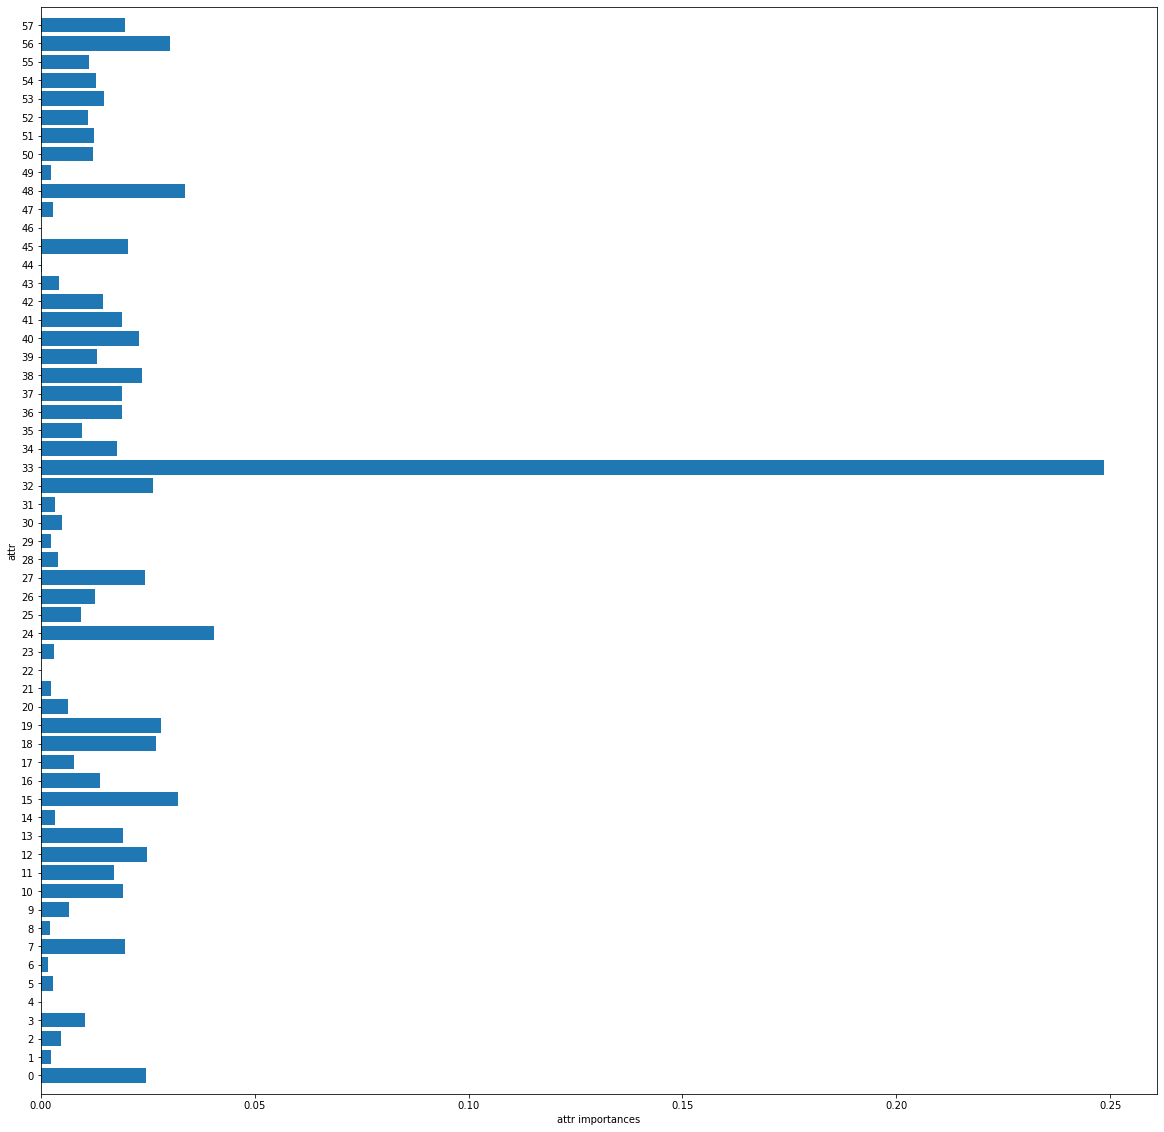

In [15]:
## eature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것

def plot_feature_importances(model):
    
    plt.figure(figsize=(20,20))

    n_features = X.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features))

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)

plot_feature_importances(rfc)
plt.show()

In [16]:
dict_imp = {}

for i in range(X.shape[1]):
    dict_imp[i] = rfc.feature_importances_[i]

In [17]:
dict_imp

{0: 0.024667879758155768,
 1: 0.00239915461122665,
 2: 0.004790620860834723,
 3: 0.010415730474848324,
 4: 0.0,
 5: 0.002916907615827006,
 6: 0.0015814472848615013,
 7: 0.019673456748009407,
 8: 0.002026366854195416,
 9: 0.006556206734898747,
 10: 0.019265967774351817,
 11: 0.016984586145543233,
 12: 0.024701166222859842,
 13: 0.019112953287663614,
 14: 0.003168354699324569,
 15: 0.031950212927508215,
 16: 0.013741433588696146,
 17: 0.00781168636779735,
 18: 0.026819962249041162,
 19: 0.02812566646875093,
 20: 0.0063562930277770375,
 21: 0.002420564999957754,
 22: 0.0,
 23: 0.0030565188296475536,
 24: 0.04051096632632488,
 25: 0.009293510318267277,
 26: 0.01254372804695885,
 27: 0.02428432128297178,
 28: 0.004102324976766761,
 29: 0.0024651302100077628,
 30: 0.004837379032871698,
 31: 0.0033568697353198187,
 32: 0.026099908168459134,
 33: 0.24850898498533355,
 34: 0.017685212016546065,
 35: 0.00957370148971154,
 36: 0.018843845733435945,
 37: 0.018940833463135864,
 38: 0.02359653711191

In [18]:
import operator

sort_imp = sorted(dict_imp.items(), key=operator.itemgetter(1), reverse=True)

print(sort_imp)

[(33, 0.24850898498533355), (24, 0.04051096632632488), (48, 0.03358105222899181), (15, 0.031950212927508215), (56, 0.030089269196411913), (19, 0.02812566646875093), (18, 0.026819962249041162), (32, 0.026099908168459134), (12, 0.024701166222859842), (0, 0.024667879758155768), (27, 0.02428432128297178), (38, 0.023596537111914336), (40, 0.02286594897961249), (45, 0.020285626748822738), (57, 0.01968459446739072), (7, 0.019673456748009407), (10, 0.019265967774351817), (13, 0.019112953287663614), (37, 0.018940833463135864), (41, 0.018879274945036377), (36, 0.018843845733435945), (34, 0.017685212016546065), (11, 0.016984586145543233), (53, 0.014661733794759862), (42, 0.014535129848968618), (16, 0.013741433588696146), (39, 0.013135948285790152), (54, 0.012922834448091513), (26, 0.01254372804695885), (51, 0.012300235239228751), (50, 0.01210230949479843), (55, 0.011175927222520822), (52, 0.011067469271211548), (3, 0.010415730474848324), (35, 0.00957370148971154), (25, 0.009293510318267277), (17,

Since there are many variables, only 20 variables are extracted using feature importance of random forest.

In [19]:
s = sort_imp[:20]

In [20]:
imp_vari = []
for i in range(len(s)):
    imp_vari.append(s[i][0])

In [21]:
imp_vari

[33, 24, 48, 15, 56, 19, 18, 32, 12, 0, 27, 38, 40, 45, 57, 7, 10, 13, 37, 41]

In [22]:
new_X = X.iloc[:,imp_vari]

In [23]:
new_X.head()

,34,25,49,16,57,20,19,33,13,1,28,39,41,46,58,8,11,14,38,42
0,-0.331234,-0.866711,-0.425458,-0.177447,2.605031,1.642584,-0.160965,-1.181860,-2.246046,-0.538477,-1.080698,0.746171,0.399742,-0.550507,1.291050,0.064301,-0.300690,-0.298794,-0.940747,-0.345176
1,0.501674,0.878191,0.142375,0.394232,1.572204,-1.337839,-0.841922,1.027727,-2.246046,-0.245012,1.330516,0.734682,-1.058649,-0.932451,-0.675577,-0.146378,1.696710,-0.935712,-1.160689,1.749180
2,0.372490,0.336093,-0.566856,-0.790220,-0.640314,0.668847,0.830898,0.789528,1.489802,0.406865,-0.061729,1.723962,1.064153,-0.399644,0.241525,-0.627468,-0.080236,-1.177219,1.012580,2.309496
3,1.885652,0.212252,-0.566856,0.944461,0.319683,-1.168948,-0.497023,-0.657319,-0.342734,-0.033871,-0.203437,0.657564,-1.833032,-1.740172,0.076873,2.360706,0.834778,0.365062,0.615042,0.215325
4,-1.780234,0.599463,-1.892561,-0.347422,1.989063,0.518467,0.830261,0.099649,0.701284,-0.033871,0.431568,0.289463,-1.146795,-1.272544,-0.459920,-0.759180,0.881376,-0.919368,0.136830,2.476906


### Decision Tree

Make Decision Tree with reduced dataset

In [24]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)

In [25]:
clf_tree =DecisionTreeClassifier(criterion = 'gini', max_depth=4, random_state=0) 

clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [26]:
# y_pred_prob => First Element: Probability to predict as 0
#             => Second Element: Probability to predict as 1

y_pred_prob = clf_tree.predict_proba(X_test)
y_pred_prob

array([[0.68816755, 0.31183245],
       [0.69845595, 0.30154405],
       [0.78304269, 0.21695731],
       ...,
       [0.68816755, 0.31183245],
       [0.55215336, 0.44784664],
       [0.68816755, 0.31183245]])

In [27]:
y_pred = clf_tree.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [28]:
print(list(y_pred).count(0),list(y_pred).count(1))

177215 2785


[Text(167.4, 195.696, 'X[0] <= 0.147\ngini = 0.426\nsamples = 720000\nvalue = [498900, 221100]'),
 Text(83.7, 152.208, 'X[0] <= 0.038\ngini = 0.422\nsamples = 401623\nvalue = [279916, 121707]'),
 Text(41.85, 108.72, 'X[0] <= -0.035\ngini = 0.429\nsamples = 370469\nvalue = [255208, 115261]'),
 Text(20.925, 65.232, 'X[0] <= -0.152\ngini = 0.422\nsamples = 349340\nvalue = [243560, 105780]'),
 Text(10.4625, 21.744, 'gini = 0.429\nsamples = 316080\nvalue = [217516, 98564]'),
 Text(31.387500000000003, 21.744, 'gini = 0.34\nsamples = 33260\nvalue = [26044, 7216]'),
 Text(62.775000000000006, 65.232, 'X[0] <= 0.023\ngini = 0.495\nsamples = 21129\nvalue = [11648, 9481]'),
 Text(52.3125, 21.744, 'gini = 0.499\nsamples = 16706\nvalue = [8634, 8072]'),
 Text(73.2375, 21.744, 'gini = 0.434\nsamples = 4423\nvalue = [3014, 1409]'),
 Text(125.55000000000001, 108.72, 'X[19] <= 0.868\ngini = 0.328\nsamples = 31154\nvalue = [24708, 6446]'),
 Text(104.625, 65.232, 'X[19] <= -1.169\ngini = 0.313\nsamples = 

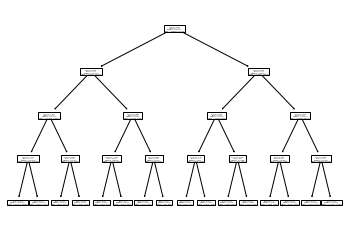

In [29]:
from sklearn import tree
clf_tree =DecisionTreeClassifier(criterion = 'gini', max_depth=4, random_state=0) 
tree.plot_tree(clf_tree.fit(X_train, y_train)) 

In [30]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image

C:\Users\hhhwa\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [31]:
target_name = np.array(['0', '1'])

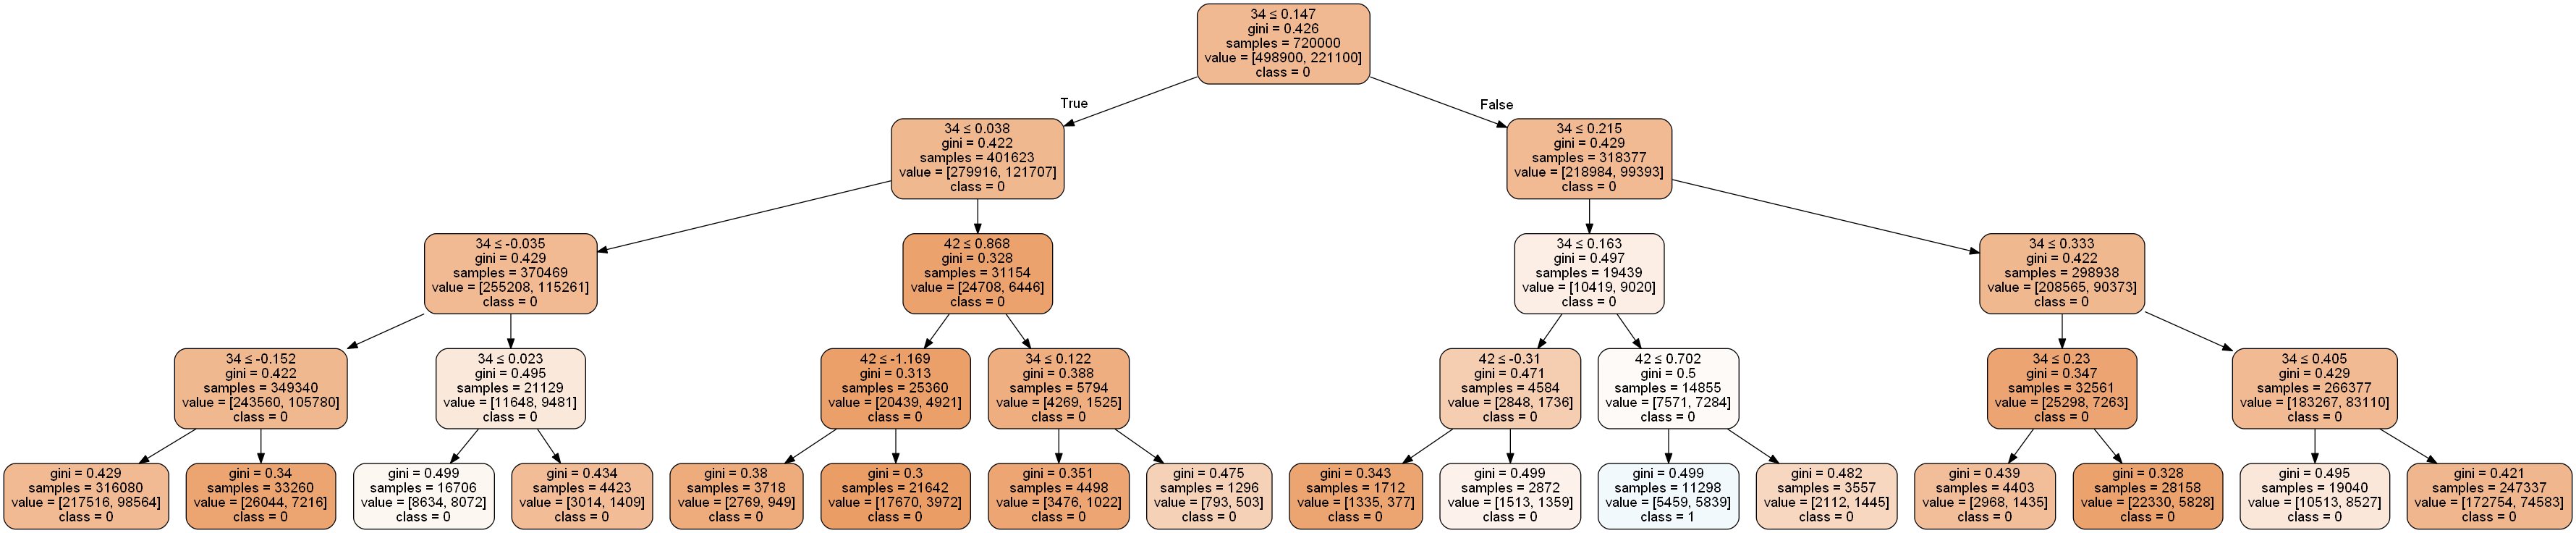

In [32]:
dot_file =StringIO()

# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, special_characters - 
tree.export_graphviz(clf_tree, feature_names=new_X.columns.tolist(), out_file = dot_file, class_names=target_name , \
                     filled =True, rounded=True, special_characters=True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

# class0: setosa, class1: versicolor, class2: virginica
Image(graph.create_png())

#### Performance Evaluation

In [33]:
from sklearn import metrics
import seaborn as sns

In [34]:
train_acc = clf_tree.score(X_train,y_train)
test_acc = clf_tree.score(X_test,y_test)

print(f'Train_Accuracy: {train_acc}')
print(f'Test_Accuracy: {test_acc}')

Train_Accuracy: 0.6934444444444444
Test_Accuracy: 0.6951833333333334


In [35]:
cnf_metrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_metrix)

[[123694   1346]
 [ 53521   1439]]


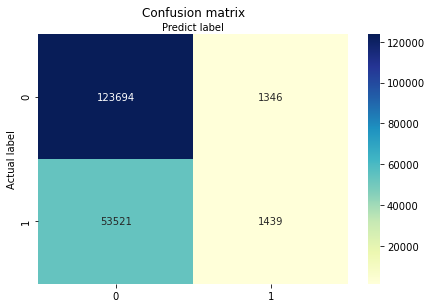

In [36]:
class_names = ['broken', 'not broken']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
 
sns.heatmap(pd.DataFrame(cnf_metrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predict label")
plt.show()

### Neural Network

#### MLP

In [37]:
Y = pd.DataFrame(y)
Y.rename(columns={0: 'target'}, inplace=True)
data = pd.concat((new_X, Y), axis = 1)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [38]:
data

,34,25,49,16,57,20,19,33,13,1,...,39,41,46,58,8,11,14,38,42,target
0,-0.331234,-0.866711,-0.425458,-0.177447,2.605031,1.642584,-0.160965,-1.181860,-2.246046,-0.538477,...,0.746171,0.399742,-0.550507,1.291050,0.064301,-0.300690,-0.298794,-0.940747,-0.345176,1
1,0.501674,0.878191,0.142375,0.394232,1.572204,-1.337839,-0.841922,1.027727,-2.246046,-0.245012,...,0.734682,-1.058649,-0.932451,-0.675577,-0.146378,1.696710,-0.935712,-1.160689,1.749180,0
2,0.372490,0.336093,-0.566856,-0.790220,-0.640314,0.668847,0.830898,0.789528,1.489802,0.406865,...,1.723962,1.064153,-0.399644,0.241525,-0.627468,-0.080236,-1.177219,1.012580,2.309496,0
3,1.885652,0.212252,-0.566856,0.944461,0.319683,-1.168948,-0.497023,-0.657319,-0.342734,-0.033871,...,0.657564,-1.833032,-1.740172,0.076873,2.360706,0.834778,0.365062,0.615042,0.215325,1
4,-1.780234,0.599463,-1.892561,-0.347422,1.989063,0.518467,0.830261,0.099649,0.701284,-0.033871,...,0.289463,-1.146795,-1.272544,-0.459920,-0.759180,0.881376,-0.919368,0.136830,2.476906,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,0.444863,1.255776,-0.853709,-1.435620,0.689730,0.274708,1.200275,0.714207,-0.244103,-0.898006,...,0.500579,0.311801,-0.037305,-1.483965,0.071090,0.073122,1.413460,1.014903,-0.043591,0
899996,1.156819,1.255776,-0.853709,-1.435620,-0.704185,0.121335,0.474302,0.922305,0.386444,-0.807941,...,0.896178,-0.922509,-0.424979,1.067435,-1.627879,0.721172,0.313308,-0.240548,0.974291,0
899997,-0.562207,-0.904078,0.222418,0.338271,-0.258972,0.121335,-0.188996,0.613469,-1.473215,-1.666948,...,1.130115,0.678798,1.351457,0.833245,0.841915,-1.534095,1.358305,0.413283,0.068034,1
899998,-1.391747,-0.784152,0.446889,-0.775060,-0.334002,0.732708,0.440019,-0.751514,-1.473215,-1.666948,...,-0.667636,2.102621,0.751062,0.379993,-0.004380,-1.224729,1.693487,-0.033770,1.447989,0


In [39]:
from keras.utils.np_utils import to_categorical

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(720000, 20) (180000, 20) (720000,) (180000,)


In [42]:
y_train

724224    0
243533    0
243957    1
443516    0
82018     0
         ..
882371    1
152315    1
117952    0
435829    0
305711    1
Name: target, Length: 720000, dtype: int64

In [43]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(20, input_dim=20, init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

C:\Users\hhhwa\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, input_dim=20, activation="relu", kernel_initializer="uniform")`
  
C:\Users\hhhwa\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\hhhwa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [44]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=10, batch_size=1000, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 576000 samples, validate on 144000 samples
Epoch 1/10
576000/576000 [==============================] - 1s 2us/step - loss: 0.6253 - accuracy: 0.6925 - val_loss: 0.6182 - val_accuracy: 0.6919
Epoch 2/10
576000/576000 [==============================] - 1s 2us/step - loss: 0.6170 - accuracy: 0.6932 - val_loss: 0.6180 - val_accuracy: 0.6919
Epoch 3/10
576000/576000 [==============================] - 1s 2us/step - loss: 0.6168 - accuracy: 0.6932 - val_loss: 0.6180 - val_accuracy: 0.6919
Epoch 4/10
576000/576000 [==============================] - 1s 2us/step - loss: 0.6167 - accuracy: 0.6932 - val_loss: 0.6179 - val_accuracy: 0.6919
Epoch 5/10
576000/576000 [==============================] - 1s 2us/step - loss: 0.6166 - accuracy: 0.6932 - val_loss: 0.6179 - val_accuracy: 0.6919
Epoch 6/10
576000/576000 [==============================] - 1s 2us/step - loss: 0.6166 - accuracy: 0.6932 - val_l

In [45]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

180000/180000 [==============================] - 1s 7us/step
accuracy: 69.47%


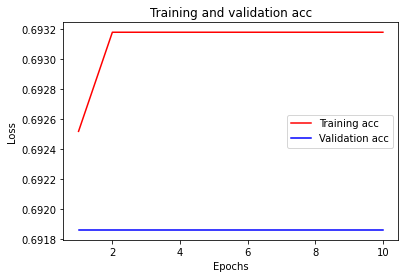

In [64]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

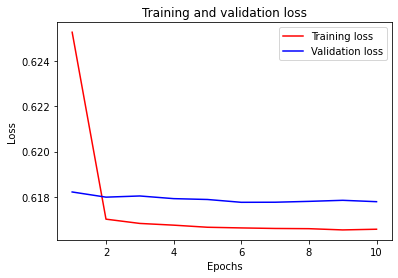

In [46]:
import matplotlib.pyplot as plt

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

#### RNN

In [68]:
nn_X = new_X.values.reshape(new_X.shape[0],new_X.shape[1],1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(nn_X, y, test_size=0.2, random_state=0)

In [70]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (720000, 20, 1)
y_train.shape =  (720000,)
X_test.shape =  (180000, 20, 1)
y_test.shape =  (180000,)


In [71]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(20,activation="relu",return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(20,activation="relu",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(20,activation="relu",return_sequences=False))
rnn_model.add(Dropout(0.15))

rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 20, 20)            440       
_________________________________________________________________
dropout_7 (Dropout)          (None, 20, 20)            0         
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 20, 20)            820       
_________________________________________________________________
dropout_8 (Dropout)          (None, 20, 20)            0         
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 20)                820       
_________________________________________________________________
dropout_9 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [72]:
rnn_model.compile(optimizer="adam",loss="binary_crossentropy")
hist_rnn = rnn_model.fit(X_train, y_train, epochs=10, batch_size=1000, validation_split=0.2, shuffle=False)

Train on 576000 samples, validate on 144000 samples
Epoch 1/10
576000/576000 [==============================] - 27s 47us/step - loss: 0.6258 - val_loss: 0.6178
Epoch 2/10
576000/576000 [==============================] - 25s 44us/step - loss: 0.6180 - val_loss: 0.6177
Epoch 3/10
576000/576000 [==============================] - 26s 45us/step - loss: 0.6175 - val_loss: 0.6177
Epoch 4/10
576000/576000 [==============================] - 32s 56us/step - loss: 0.6172 - val_loss: 0.6177
Epoch 5/10
576000/576000 [==============================] - 34s 59us/step - loss: 0.6170 - val_loss: 0.6177
Epoch 6/10
576000/576000 [==============================] - 29s 50us/step - loss: 0.6169 - val_loss: 0.6177
Epoch 7/10
576000/576000 [==============================] - 28s 49us/step - loss: 0.6169 - val_loss: 0.6177
Epoch 8/10
576000/576000 [==============================] - 33s 57us/step - loss: 0.6167 - val_loss: 0.6177
Epoch 9/10
576000/576000 [==============================] - 33s 57us/step - loss: 0.

In [73]:
rnn_predictions = rnn_model.predict(X_test)

rnn_score = r2_score(y_test,rnn_predictions)
print("R2 Score of RNN model = ",rnn_score)

R2 Score of RNN model =  -0.00016766832781578422


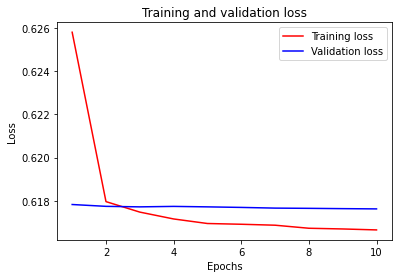

In [74]:
import matplotlib.pyplot as plt

loss = hist_rnn.history['loss']
val_loss = hist_rnn.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()